## SciPy Overview

The SciPy library is a collection of packages that build on NumPy to provide tools for scientific computing. It includes submodules that deal with optimization, Fourier transformations, signal processing, linear algebra, image processing, and statistics, among others. This chapter touches on three submodules: the `scipy.misc` submodule, the `scipy.special` submodule, and `scipy.stats`, which is the submodule most useful for data science.

This chapter also uses the library `matplotlib` for some examples. It has visualization capabilities for numerous plot types as well as images. The convention for importing its plotting library is to import it with the name `plt`:

In [1]:
import matplotlib.pyplot as plt

## The `scipy.misc` Submodule

The `scipy.misc` submodule contains functions that don’t have a home elsewhere. One fun function in this module is `scipy.misc.face()`, which can be run with this code:

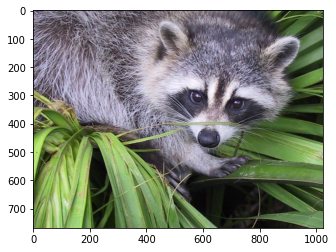

In [2]:
from scipy import misc
import matplotlib.pyplot as plt

face = misc.face()
plt.imshow(face)
plt.show()

The `ascent` function returns a grayscale image that is available for use and demos. If you call `ascent()`, the result is a two-dimensional NumPy array:

In [3]:
a = misc.ascent()
print(a)

[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]


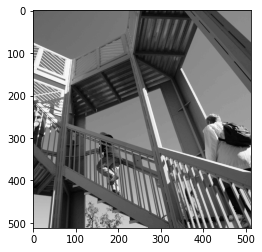

In [9]:
plt.imshow(a, cmap=plt.get_cmap("Greys_r"))
plt.show()

## The `scipy.special` Submodule

The `scipy.special` submodule contains utilities for mathematical physics. It includes Airy functions, elliptical functions, Bessel functions, Struve functions, and many more. The majority of these functions support broadcasting and are compatible with NumPy arrays. To use the functions, you simply import `scipy.special` from SciPy and call the functions directly. For example, you can calculate the factorial of a number by using the `special.factorial()` function:

In [10]:
from scipy import special

special.factorial(3)

6.0

You can calculate the number of combinations or permutations as follows:

In [11]:
special.comb(10, 2)

45.0

In [12]:
special.perm(10,2)

90.0

In [13]:
special.factorial(10) / (special.factorial(8) * special.factorial(2))  # identical to comb()

45.0

This example shows 10 items and choosing 2 of them at a time.

## The `scipy.stats` Submodule

The `scipy.stats` submodule offers probability distributions and statistical functions. The following sections take a look at just a few of the distributions offered in this submodule.

### Discrete Distributions

SciPy offers some discrete distributions that share some common methods.

**Binomial Distribution**

These common methods are demonstrated in the next listing using a binomial distribution. A binomial distribution involves some number of trials, with each trial having either a success or failure outcome.

In [1]:
from scipy import stats

B = stats.binom(20, 0.3) # Define a binomial distribution consisting of 
                         # 20 trials and 30% chance of success 

In [2]:
B.pmf(2) # Probability mass function (probability that a sample is equal to 2)

0.02784587252426866

In [4]:
B.cdf(4) # Cumulative distribution function (probability that a sample is less or equal than 4)

0.2375077788776017

In [5]:
p = 0
for i in range(5):
    p += B.pmf(i)
    
p

0.23750777887760127

In [7]:
B.mean() # Mean of the distribution 

6.0

In [25]:
B.pmf(B.mean())

0.19163898275344177

In [9]:
B.var()# Variance of the distribution

4.199999999999999

In [10]:
B.std()# Standard deviation of the distribution

2.0493901531919194

In [12]:
B.rvs()# Get a random sample from the distribution

10

In [13]:
B.rvs(15) # Get 15 random samples

array([10,  7,  7,  7,  2,  8,  6,  6,  2,  7,  6,  7,  9,  5,  7])

If you take a large enough random sample of the distribution you can use matplotlib to plot it and get a sense of its shape:

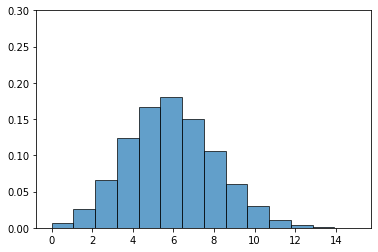

In [33]:
# Figure 8-2
import matplotlib.pyplot as plt

rvs = B.rvs(size=100000)

plt.hist(rvs, alpha=0.7, edgecolor="k", density=True, bins=14) # watch your bins!!
plt.ylim([0,0.3])
plt.show()

The numbers along the bottom of the distribution in Figure 8.2 represent the number of successes in each 20-trial experiment. You can see that 6 out of 20 is the most common result, and it matches the 30% success rate.

### Continuous Distributions

The `scipy.stats` submodule includes many more continuous than discrete distributions; it has 87 continuous distributions as of this writing. These distributions all take arguments for location (`loc`) and scale (`scale`). They all default to a location of 0 and scale of 1.0.

One continuous distribution modeled is the Normal distribution, which may be familiar to you as the bell curve. In this symmetric distribution, half of the data is to the left of the mean and half to the right. Here’s how you can make a normal distribution using the default location and scale:



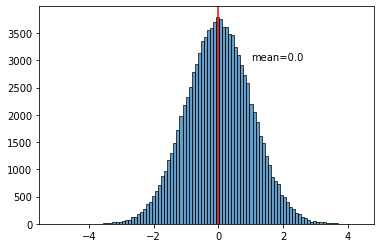

In [66]:
N = stats.norm()

rvs = N.rvs(size=100000)

plt.hist(rvs, bins=100, alpha=0.7, edgecolor="k")
plt.axvline(x=rvs.mean(), color="red")
plt.annotate(f"mean={round(rvs.mean(),2)}", (1, 3000))
plt.show()

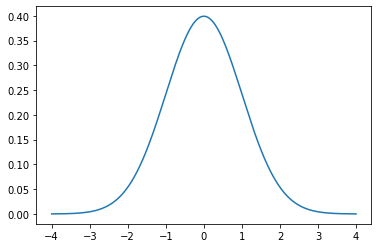

In [42]:
import numpy as np

x = np.linspace(-4, 4, 1000)

plt.plot(x, N.pdf(x))

You can see that the distribution is centered on 0 and is encompassed roughly between –4 and 4. Figure 8.6 shows the effects of creating a second normal distribution—this time setting the location to 30 and the scale to 50:

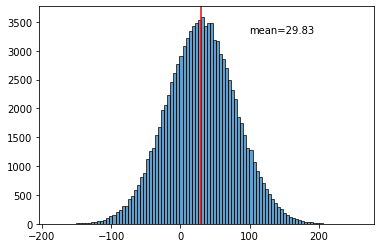

In [63]:
# Figure 8-6

N1 = stats.norm(loc=30, scale=50)

rvs = N1.rvs(size=100000)

plt.hist(rvs, bins=100, alpha=0.7, edgecolor="k")
plt.axvline(x=rvs.mean(), color="red")
plt.annotate(f"mean={round(rvs.mean(),2)}", (100, 3300))
plt.show()

**Normal Distribution**

Notice that the distribution is now centered around 30 and encompasses a much wider range of numbers. Continuous distributions share some common functions, which are modeled in the next listing. Notice that this listing uses the second Normal distribution with the offset location and greater standard deviation.



In [67]:
N1 = stats.norm(loc=30, scale=50)

In [68]:
N1.pdf(4)  # Probability density function

0.006969850255179491

In [69]:
N1.cdf(2) # Cumulative distribution function

0.28773971884902705

In [70]:
N1.rvs() # A random sample

28.229659510354644

In [72]:
N1.mean()  # Mean

30.0

In [71]:
N1.var() # Variance

2500.0

In [73]:
N1.median()  # Median

30.0

In [75]:
N1.std() # Standard deviation

50.0

The following continuous distribution is an exponential distribution, which is characterized by an exponentially changing curve, either up or down (see Figure 8.7):

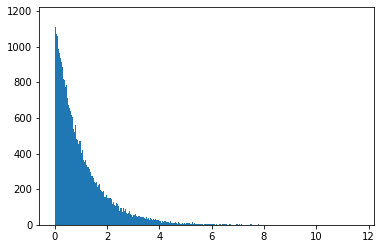

In [76]:
E = stats.expon()
rvs = E.rvs(size=100000)
plt.hist(rvs, bins=1000)
plt.show()

You can see that Figure 8.7 displays a curve as you would expect from an exponential function. The following is a uniform distribution, which is has a constant probability and is also known as a rectangular distribution:

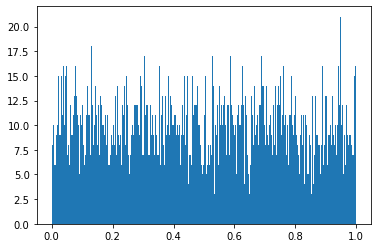

In [77]:
U = stats.uniform()
rvs = U.rvs(size=10000)

plt.hist(rvs, bins=1000)
plt.show()

**Summary**

The NumPy and SciPy libraries both offer utilities for solving complex mathematical problems. These two libraries cover a great breadth and depth of resources, and entire books have been devoted to their application. You have seen only a few of the many capabilities. These libraries are the first places you should look when you embark on solving or modeling complex mathematical problems.


## Questions

1. Use the `scipy.stats` submodule to model a Normal distribution with a mean of 15.

2. Generate 25 random samples from the distribution modeled in Question 1.

3. Which scipy submodule has utilities designed for mathematical physics?

4. What method is provided with a discrete distribution to calculate its standard deviation?